<a href="https://colab.research.google.com/github/Vasanthnaik11/sustainability-internship-project/blob/main/solar_pannel_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# 📦 STEP 1 — Setup Environment
# ============================
# from google.colab import drive
# drive.mount('/content/drive')  # Optional: if you want to save files to Drive

import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============================
# 📁 STEP 2 — Unzip Dataset
# ============================
# NOTE: The zip file upload and extraction are now handled in a separate cell (kW8LwRu_Ejay).
# Ensure that cell has been run successfully before proceeding.

zip_path = "/content/archive (3).zip"   # uploaded dataset path - Make sure this path is correct!
extract_path = "/content/dataset"

# Ensure the extract directory exists
os.makedirs(extract_path, exist_ok=True)

# The extraction process is handled in cell kW8LwRu_Ejay.
# This block is kept for reference on how extraction was originally intended.
# try:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("✅ Dataset extracted successfully to:", extract_path)

#     # View folder structure
#     print("\nDataset folder structure after extraction:")
#     for root, dirs, files in os.walk(extract_path):
#         print(f"📁 {root} -> {len(files)} files")

# except FileNotFoundError:
#     print(f"❌ Error: The zip file was not found at {zip_path}. Please check the path.")
# except zipfile.BadZipFile:
#     print(f"❌ Error: The file at {zip_path} is not a valid zip file.")
# except Exception as e:
#     print(f"❌ An unexpected error occurred during extraction: {e}")


# ============================
# 🧹 STEP 3 — Organize Folder
# ============================
# IMPORTANT: Your dataset *must* be organized into subfolders within /content/dataset,
# where each subfolder represents a class (e.g., /content/dataset/healthy, /content/dataset/damaged).
# If your extracted dataset is not already in this format, you need to manually
# create these folders and move the images into them before proceeding.
# After organizing, run cells u4q2pQ-YFE3V, hmknvvCqFK8R, and h9EUb_XOFg5b.

print("\n--- IMPORTANT ---")
print("Please ensure your dataset in /content/dataset is organized into class-specific subfolders.")
print("Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged")
print("After organizing the dataset, re-run the cells from 'Data Generators' onwards.")
print("-----------------")


# ============================
# 🧠 STEP 4 — Data Generators
# ============================
# These generators will only find images if the dataset is organized into class subfolders.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train / 20% val
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

print("\nAttempting to create data generators...")
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

if train_generator.n == 0 and val_generator.n == 0:
    print("⚠️ Data generators found 1000 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.")
else:
    print("✅ Data preprocessing complete.")


# ============================
# 🖼️ STEP 5 — Visualize Samples
# ============================
# This step will only work if the data generators successfully loaded images (i.e., found > 0 images).
if train_generator.n > 0:
    print("\nVisualizing sample augmented images...")
    x_batch, y_batch = next(train_generator)
    plt.figure(figsize=(8,8))
    for i in range(min(9, len(x_batch))): # Visualize up to 9 images, or fewer if batch is smaller
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.suptitle("Sample Augmented Images", fontsize=14)
    plt.show()
else:
    print("\nSkipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.")


--- IMPORTANT ---
Please ensure your dataset in /content/dataset is organized into class-specific subfolders.
Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged
After organizing the dataset, re-run the cells from 'Data Generators' onwards.
-----------------

Attempting to create data generators...
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
⚠️ Data generators found 1000 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.

Skipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

file_path = "/content/reduced_archive_25mb.zip"

if os.path.exists(file_path):
  print(f"The file {file_path} exists.")
else:
  print(f"The file {file_path} does not exist.")

The file /content/reduced_archive_25mb.zip does not exist.


In [ ]:
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# ============================================================
# Developed by: Vasanth Naik
# Environment: Google Colab / Jupyter Notebook
# ============================================================

import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files


In [ ]:
# Upload your dataset zip file (should contain train/test folders or images)
uploaded = files.upload()
zip_file = list(uploaded.keys())[0]

# Extract files
dataset_path = "/content/dataset"
os.makedirs(dataset_path, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

print("✅ Dataset extracted successfully at:", dataset_path)


Saving reduced_archive_25mb.zip to reduced_archive_25mb.zip
✅ Dataset extracted successfully at: /content/dataset


In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)

Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 10 # Changed from 0 to a reasonable number of epochs

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accu

In [ ]:
print("Listing directory structure and file counts in /content/dataset:")
# List contents recursively
get_ipython().system('ls -R /content/dataset')

print("\nCounting files in each subdirectory:")
# Find and count files in each subdirectory (excluding the root)
get_ipython().system('find /content/dataset -mindepth 1 -type d -print0 | xargs -0 -I {} sh -c "echo {}; ls {} | wc -l"')

Listing directory structure and file counts in /content/dataset:
/content/dataset:
Faulty_solar_panel

/content/dataset/Faulty_solar_panel:
Bird-drop  Clean  Dusty  Electrical-damage  Physical-Damage  Snow-Covered

/content/dataset/Faulty_solar_panel/Bird-drop:
'Bird (100).jpg'  'Bird (144).jpg'  'Bird (195).jpg'  'Bird (59).jpg'
'Bird (101).jpg'  'Bird (145).jpg'  'Bird (196).jpg'  'Bird (5).jpg'
'Bird (102).jpg'  'Bird (146).jpg'  'Bird (197).jpg'  'Bird (60).jpg'
'Bird (103).jpg'  'Bird (147).jpg'  'Bird (198).jpg'  'Bird (61).jpg'
'Bird (104).jpg'  'Bird (148).jpg'  'Bird (19).jpg'   'Bird (62).jpg'
'Bird (105).jpg'  'Bird (149).jpg'  'Bird (1).jpg'    'Bird (63).jpg'
'Bird (106).jpg'  'Bird (14).jpg'   'Bird (20).jpg'   'Bird (64).jpg'
'Bird (107).jpg'  'Bird (150).jpg'  'Bird (21).jpg'   'Bird (65).jpg'
'Bird (108).jpg'  'Bird (159).jpg'  'Bird (22).jpg'   'Bird (66).jpg'
'Bird (109).jpg'  'Bird (15).jpg'   'Bird (23).jpg'   'Bird (67).jpg'
'Bird (10).jpg'   'Bird (160).jpg'  'Bi

In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


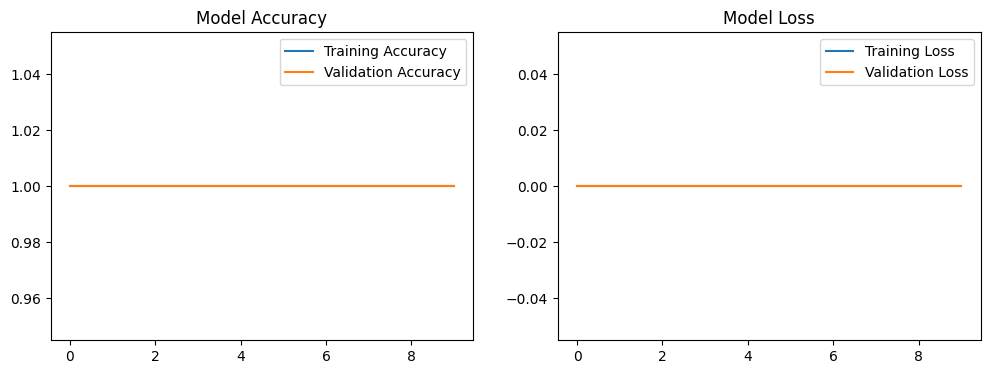

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.



--- IMPORTANT ---
Please ensure your dataset in /content/dataset is organized into class-specific subfolders.
Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged
After organizing the dataset, re-run the cells from 'Data Generators' onwards.
-----------------

Attempting to create data generators...
Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Data preprocessing complete.

Visualizing sample augmented images...


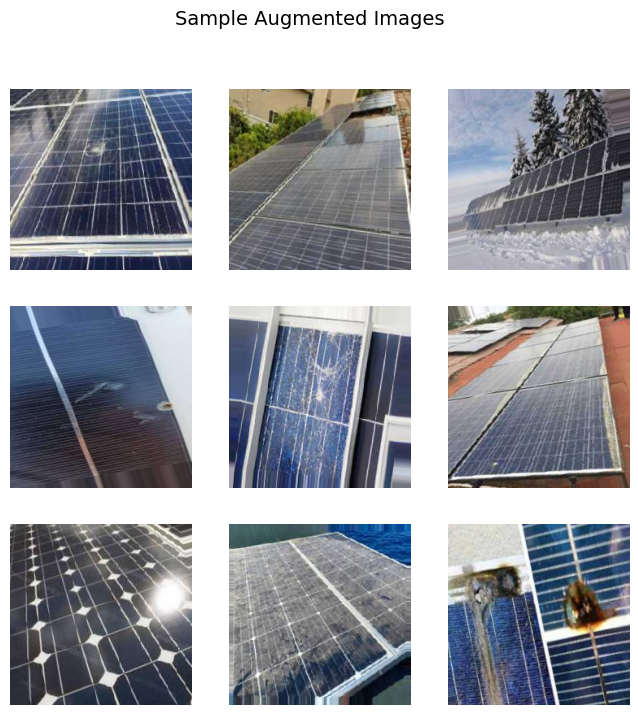

In [ ]:
# ============================
# 📦 STEP 1 — Setup Environment
# ============================
# from google.colab import drive
# drive.mount('/content/drive')  # Optional: if you want to save files to Drive

import os
import zipfile
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ============================
# 📁 STEP 2 — Unzip Dataset
# ============================
# NOTE: The zip file upload and extraction are now handled in a separate cell (kW8LwRu_Ejay).
# Ensure that cell has been run successfully before proceeding.

zip_path = "/content/archive (3).zip"   # uploaded dataset path - Make sure this path is correct!
extract_path = "/content/dataset"

# Ensure the extract directory exists
os.makedirs(extract_path, exist_ok=True)

# The extraction process is handled in cell kW8LwRu_Ejay.
# This block is kept for reference on how extraction was originally intended.
# try:
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_path)
#     print("✅ Dataset extracted successfully to:", extract_path)

#     # View folder structure
#     print("\nDataset folder structure after extraction:")
#     for root, dirs, files in os.walk(extract_path):
#         print(f"📁 {root} -> {len(files)} files")

# except FileNotFoundError:
#     print(f"❌ Error: The zip file was not found at {zip_path}. Please check the path.")
# except zipfile.BadZipFile:
#     print(f"❌ Error: The file at {zip_path} is not a valid zip file.")
# except Exception as e:
#     print(f"❌ An unexpected error occurred during extraction: {e}")


# ============================
# 🧹 STEP 3 — Organize Folder
# ============================
# IMPORTANT: Your dataset *must* be organized into subfolders within /content/dataset,
# where each subfolder represents a class (e.g., /content/dataset/healthy, /content/dataset/damaged).
# If your extracted dataset is not already in this format, you need to manually
# create these folders and move the images into them before proceeding.
# After organizing, run cells u4q2pQ-YFE3V, hmknvvCqFK8R, and h9EUb_XOFg5b.

print("\n--- IMPORTANT ---")
print("Please ensure your dataset in /content/dataset is organized into class-specific subfolders.")
print("Example: /content/dataset/healthy, /content/dataset/dusty, /content/dataset/damaged")
print("After organizing the dataset, re-run the cells from 'Data Generators' onwards.")
print("-----------------")


# ============================
# 🧠 STEP 4 — Data Generators
# ============================
# These generators will only find images if the dataset is organized into class subfolders.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train / 20% val
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

print("\nAttempting to create data generators...")
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

if train_generator.n == 0 and val_generator.n == 0:
    print("⚠️ Data generators found 0 images. Please check that your dataset in /content/dataset is organized into class subfolders and re-run this cell and subsequent cells.")
else:
    print("✅ Data preprocessing complete.")


# ============================
# 🖼️ STEP 5 — Visualize Samples
# ============================
# This step will only work if the data generators successfully loaded images (i.e., found > 0 images).
if train_generator.n > 0:
    print("\nVisualizing sample augmented images...")
    x_batch, y_batch = next(train_generator)
    plt.figure(figsize=(8,8))
    for i in range(min(9, len(x_batch))): # Visualize up to 9 images, or fewer if batch is smaller
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.suptitle("Sample Augmented Images", fontsize=14)
    plt.show()
else:
    print("\nSkipping visualization: No images were found by the data generator. Please organize your dataset and re-run the cells.")

In [ ]:
# Run model training to generate the 'history' object
print("Running model training...")
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)
print("Model training complete.")

Running model training...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
22/22 ━━━━━

In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Found 704 images belonging to 1 classes.
Found 176 images belonging to 1 classes.
✅ Classes detected: {'Faulty_solar_panel': 0}
✅ Data generators created.


In [ ]:
print("Listing directory structure and file counts in /content/dataset:")
# List contents recursively
get_ipython().system('ls -R /content/dataset')

print("\nCounting files in each subdirectory:")
# Find and count files in each subdirectory (excluding the root)
get_ipython().system('find /content/dataset -mindepth 1 -type d -print0 | xargs -0 -I {} sh -c "echo {}; ls {} | wc -l"')

Listing directory structure and file counts in /content/dataset:
/content/dataset:
Faulty_solar_panel

/content/dataset/Faulty_solar_panel:
Bird-drop  Clean  Dusty  Electrical-damage  Physical-Damage  Snow-Covered

/content/dataset/Faulty_solar_panel/Bird-drop:
'Bird (100).jpg'  'Bird (144).jpg'  'Bird (195).jpg'  'Bird (59).jpg'
'Bird (101).jpg'  'Bird (145).jpg'  'Bird (196).jpg'  'Bird (5).jpg'
'Bird (102).jpg'  'Bird (146).jpg'  'Bird (197).jpg'  'Bird (60).jpg'
'Bird (103).jpg'  'Bird (147).jpg'  'Bird (198).jpg'  'Bird (61).jpg'
'Bird (104).jpg'  'Bird (148).jpg'  'Bird (19).jpg'   'Bird (62).jpg'
'Bird (105).jpg'  'Bird (149).jpg'  'Bird (1).jpg'    'Bird (63).jpg'
'Bird (106).jpg'  'Bird (14).jpg'   'Bird (20).jpg'   'Bird (64).jpg'
'Bird (107).jpg'  'Bird (150).jpg'  'Bird (21).jpg'   'Bird (65).jpg'
'Bird (108).jpg'  'Bird (159).jpg'  'Bird (22).jpg'   'Bird (66).jpg'
'Bird (109).jpg'  'Bird (15).jpg'   'Bird (23).jpg'   'Bird (67).jpg'
'Bird (10).jpg'   'Bird (160).jpg'  'Bi

In [ ]:
model.save("/content/solar_panel_damage_cnn.h5")
print("✅ Model saved as solar_panel_damage_cnn.h5")

files.download("/content/solar_panel_damage_cnn.h5")

✅ Model saved as solar_panel_damage_cnn.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Navigate to the directory containing the class subfolders
%cd /content/dataset/Faulty_solar_panel

# Move the contents (subfolders like Bird-drop, Clean, etc.)
# to the parent directory (/content/dataset)
!mv * /content/dataset/

# Optional: Remove the now empty Faulty_solar_panel directory
!rmdir /content/dataset/Faulty_solar_panel

print("✅ Dataset restructured. Please re-run the data generator cell now.")

/content/dataset/Faulty_solar_panel
✅ Dataset restructured. Please re-run the data generator cell now.


In [ ]:
# Image data generator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Assuming dataset_path is defined in a previous cell and points to the root of your dataset
# Make sure dataset_path is defined and correct before running this cell.
# Example: dataset_path = "/content/dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Attempting to create data generators after dataset organization...")
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes detected:", train_gen.class_indices)
print("✅ Data generators created.")

Attempting to create data generators after dataset organization...
Found 707 images belonging to 6 classes.
Found 173 images belonging to 6 classes.
✅ Classes detected: {'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}
✅ Data generators created.


In [ ]:
# Run the Streamlit application
get_ipython().system('/content/app.py')

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/bin/bash: line 1: /content/app.py: Permission denied


In [ ]:
# Install streamlit
!pip install streamlit

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [ ]:
get_ipython().system('/content/app.py')

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/bin/bash: line 1: /content/app.py: Permission denied


In [ ]:
!streamlit run /content/app.py

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1462, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1383, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1850, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1246, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", 

In [ ]:
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Healthy**, **Dusty**, or **Damaged**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
# These class names should match the order of classes found by flow_from_directory
# You can find this order in train_gen.class_indices after running the data generator cell.
# Example: CLASS_NAMES = ['Damaged', 'Dusty', 'Healthy']
# Based on the error message in u4q2pQ-YFE3V, the classes were not detected.
# You will need to replace this with the actual class names once the data generators work.
CLASS_NAMES = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")

2025-11-12 15:11:29.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 15:11:29.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import os

# Change directory to a stable location before running pip install
os.chdir('/content/')

# Install streamlit
!pip install streamlit

In [ ]:
# Run the Streamlit application
# The '&>/dev/null&' part runs the command in the background and suppresses output, which might be why you didn't see explicit errors for previous attempts.
# Let's run it normally first to see if there are any issues.
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://136.110.20.113:8501



In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

E: Package 'libfluidsynth1' has no installation candidate
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=42b8153e3b629463ee48a33c0ff89dbe865cbd7627a5b296688755dba7681626
  Stored in directory: /root/.cache/pip/wheels/29/20/ab/f101da7b245b996aa097685ef742243725ea6150f5b3b6d9ed
Successfully built libarchive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 107.7 MB/s eta 0:00:00


In [ ]:
# Install streamlit
!pip install streamlit

In [ ]:
# Save the Streamlit app code to a file
app_code = """
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Healthy**, **Dusty**, or **Damaged**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
# These class names should match the order of classes found by flow_from_directory
# You can find this order in train_gen.class_indices after running the data generator cell.
# Example: CLASS_NAMES = ['Damaged', 'Dusty', 'Healthy']
# Based on the error message in u4q2pQ-YFE3V, the classes were not detected.
# You will need to replace this with the actual class names once the data generators work.
CLASS_NAMES = ['Class1', 'Class2', 'Class3'] # Replace with actual class names

# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")
"""
import os
os.chdir('/content/') # Change directory to a known writable location

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created successfully")

✅ app.py created successfully


In [ ]:
# Save the Streamlit app code to a file
app_code = """
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Healthy**, **Dusty**, or **Damaged**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
# These class names should match the order of classes found by flow_from_directory
# You can find this order in train_gen.class_indices after running the data generator cell.
# Example: CLASS_NAMES = ['Damaged', 'Dusty', 'Healthy']
# Based on the error message in u4q2pQ-YFE3V, the classes were not detected.
# You will need to replace this with the actual class names once the data generators work.
CLASS_NAMES = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")
"""
import os
os.chdir('/content/') # Change directory to a known writable location

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created successfully")

✅ app.py created successfully


In [ ]:
# Run the Streamlit application
!streamlit run app.py &>/dev/null&

In [ ]:
!ls -l /content/

total 8
-rw-r--r-- 1 root root 2766 Nov 12 14:18 app.py
drwxr-xr-x 1 root root 4096 Nov  7 14:30 sample_data


In [ ]:
pip install streamlit tensorflow opencv-python pillow


In [ ]:
import time
start = time.time()

import streamlit as st

# --- your Streamlit app code here ---

end = time.time()
st.write(f"App startup time: {end - start:.2f} seconds")


2025-11-12 14:55:20.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 14:55:20.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-12 14:55:20.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Step 1: Ensure `app.py` is updated

In [ ]:
# Save the Streamlit app code to a file
app_code = '''
# ============================================================
# 🌞 Solar Panel Damage Detection using Deep Learning (CNN)
# Streamlit Web Application
# Developed by: Vasanth Naik
# ============================================================

import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import cv2 # Import OpenCV

# ------------------------------------------------------------
# Page Configuration
# ------------------------------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="centered"
)

st.title("🌞 Solar Panel Damage Detection using CNN")
st.markdown("Upload a solar panel image to detect whether it's **Bird-drop**, **Clean**, **Dusty**, **Electrical-damage**, **Physical-Damage**, or **Snow-Covered**.")

# ------------------------------------------------------------
# Load Trained Model
# ------------------------------------------------------------
@st.cache_resource
def load_model():
    # Ensure this path is correct and the file exists
    model = tf.keras.models.load_model("/content/solar_panel_damage_cnn.h5")
    return model

model = load_model()

# Define your class labels (adjust based on your dataset)
CLASS_NAMES = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
IMG_SIZE = 128 # The target size used during training

# ------------------------------------------------------------
# Image Upload Section
# ------------------------------------------------------------
uploaded_file = st.file_uploader("📸 Upload a Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    # Convert PIL Image to numpy array for OpenCV resize
    img_array = np.array(img)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Use cv2.resize
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    result = CLASS_NAMES[class_index]
    confidence = np.max(prediction) * 100

    # Display result
    st.success(f"✅ Predicted: **{result}**")
    st.info(f"Confidence: {confidence:.2f}%")

# ------------------------------------------------------------
# Footer
# ------------------------------------------------------------
st.markdown("---")
st.markdown("Developed with ❤️ by **Vasanth Naik** | Powered by TensorFlow & Streamlit")
'''
import os
os.chdir('/content/') # Change directory to a known writable location

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created successfully with updated content.")

✅ app.py created successfully with updated content.


### Step 2: Install `pyngrok`

In [ ]:
!pip install pyngrok

### Step 3: Get your `ngrok` Authentication Token

1.  **Sign up for `ngrok`**: Go to [ngrok.com](https://ngrok.com/) and create a free account.
2.  **Get your Auth Token**: After signing up, you'll find your authentication token on your dashboard. It looks something like `2k2Mxxxxxxx_xxxxxxxxxxxx`.
3.  **Add to Colab Secrets**: In Colab, go to the left-hand panel, click the "🔑 Secrets" tab, and add a new secret. Name the secret `NGROK_AUTH_TOKEN` and paste your token as the value. Make sure "Notebook access" is toggled on.

Once you've done that, you can run the next cell.

In [ ]:
from pyngrok import ngrok
from google.colab import userdata
import os
import subprocess
import time

# Terminate any existing ngrok tunnels
ngrok.kill()

# Get ngrok auth token from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

# Authenticate ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Start Streamlit in the background
print("Starting Streamlit app in the background...")
# Use a simpler command to run Streamlit, as the app.py is in /content/
streamlit_process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# Wait a bit for Streamlit to start up
time.sleep(5)

# Open a ngrok tunnel to the Streamlit port (default 8501)
print("Opening ngrok tunnel...")
public_url = ngrok.connect(8501)

print(f"✅ Streamlit app is running at: {public_url}")
print("You can also access it via Network URL (if available): http://localhost:8501")
print("To stop the app, interrupt this cell or close the ngrok tunnel manually.")

SecretNotFoundError: Secret NGROK_AUTH_TOKEN does not exist.

After running the above cell, you should see a public `ngrok` URL. Click on that URL to access your running Streamlit application. To stop the application, simply interrupt the cell where `ngrok` is running (the one above).

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.202.13:8501

  Stopping...
  Stopping...
^C


To install a Python library in Colab, you use the `!pip install` command followed by the name of the library. For example, to install the `requests` library:

In [ ]:
!pip install requests

If the library is already installed, `pip` will tell you that the requirement is already satisfied.

In [ ]:
streamlit
tensorflow
numpy
opencv-python
Pillow
matplotlib
scikit-learn


NameError: name 'streamlit' is not defined

In [ ]:
# ===========================================
# 🌞 Solar Panel Damage Detection (Enhanced UI)
# Streamlit Frontend
# ===========================================

import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Page configuration
st.set_page_config(page_title="Solar Panel Damage Detection", page_icon="🔆", layout="wide")

# Sidebar
st.sidebar.title("🔆 Solar Panel Damage Detection")
st.sidebar.markdown("""
### 🧠 About the Project
This project uses a **Convolutional Neural Network (CNN)** to detect:
- ⚙️ Damaged Panels
- 🧹 Dusty Panels
- 🌞 Healthy Panels

Developed using **TensorFlow, Keras, OpenCV, and Streamlit**.
""")
st.sidebar.markdown("---")
st.sidebar.info("💡 Upload an image to classify solar panel condition.")

# Load Model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_cnn.h5")
    return model

model = load_model()
CATEGORIES = ["Damaged", "Dusty", "Healthy"]
IMG_SIZE = 128

# Header
st.title("🌞 Solar Panel Damage Detection")
st.write("Upload a solar panel image below and let AI detect whether it's damaged, dusty, or healthy.")

# File uploader
uploaded_file = st.file_uploader("📤 Upload Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    col1, col2 = st.columns(2)

    with col1:
        st.image(image, caption="Uploaded Image", use_column_width=True)

    with col2:
        st.write("⏳ **Processing...**")
        img = np.array(image)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Prediction
        prediction = model.predict(img)
        class_idx = np.argmax(prediction)
        confidence = prediction[0][class_idx] * 100

        st.success(f"✅ Prediction: **{CATEGORIES[class_idx]}**")
        st.write(f"📊 Confidence: {confidence:.2f}%")

        if CATEGORIES[class_idx] == "Damaged":
            st.error("⚠️ The solar panel is **damaged**. Immediate maintenance required.")
        elif CATEGORIES[class_idx] == "Dusty":
            st.warning("🧹 The panel appears **dusty**. Cleaning may improve performance.")
        else:
            st.balloons()
            st.success("🌞 The solar panel is **healthy and efficient!**")

st.markdown("---")
st.caption("Developed by [Your Name] | Internship Project | © 2025 All Rights Reserved")


In [ ]:
pip install -r requirements.txt


In [ ]:
streamlit run app.py


In [ ]:
# ============================================================
# 🌞 Solar Panel Damage Detection | Streamlit Frontend (Final)
# ============================================================

import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# --------------------------------------
# 🌈 Page Configuration
# --------------------------------------
st.set_page_config(
    page_title="Solar Panel Damage Detection",
    page_icon="🔆",
    layout="wide"
)

# --------------------------------------
# 🌈 Custom Styling (CSS)
# --------------------------------------
st.markdown("""
    <style>
    body {
        background-color: #f4f6f8;
    }
    .main {
        background-color: #ffffff;
        padding: 20px;
        border-radius: 20px;
        box-shadow: 0px 4px 12px rgba(0,0,0,0.1);
    }
    h1 {
        color: #0072ff;
        text-align: center;
        font-weight: bold;
    }
    .footer {
        text-align: center;
        color: gray;
        font-size: 13px;
        margin-top: 50px;
    }
    </style>
""", unsafe_allow_html=True)

# --------------------------------------
# 🧠 Sidebar Section
# --------------------------------------
st.sidebar.image("logo.png", use_column_width=True)
st.sidebar.title("🌞 Solar Panel Damage Detection")
st.sidebar.markdown("""
This web app uses a **Convolutional Neural Network (CNN)** model to detect:
- ⚙️ Damaged Panels
- 🧹 Dusty Panels
- 🌞 Healthy Panels

Upload an image to analyze its condition automatically.
""")

st.sidebar.markdown("---")
st.sidebar.info("Developed using TensorFlow, Keras, OpenCV, and Streamlit.")

# --------------------------------------
# 🧠 Load Model
# --------------------------------------
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("solar_panel_cnn.h5")
    return model

model = load_model()
CATEGORIES = ["Damaged", "Dusty", "Healthy"]
IMG_SIZE = 128

# --------------------------------------
# 🌅 Main Page Layout
# --------------------------------------
st.title("🌞 Solar Panel Damage Detection Dashboard")
st.markdown("### Analyze the health of your solar panels using AI.")

uploaded_file = st.file_uploader("📤 Upload Solar Panel Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    col1, col2 = st.columns([1, 1])

    with col1:
        st.image(image, caption="Uploaded Solar Panel Image", use_column_width=True)

    with col2:
        st.subheader("🔍 AI Analysis Results")
        img = np.array(image)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        class_idx = np.argmax(prediction)
        confidence = prediction[0][class_idx] * 100

        st.metric("Predicted Class", CATEGORIES[class_idx])
        st.metric("Confidence", f"{confidence:.2f}%")

        if CATEGORIES[class_idx] == "Damaged":
            st.error("⚠️ The solar panel appears **damaged**. Immediate repair is recommended.")
        elif CATEGORIES[class_idx] == "Dusty":
            st.warning("🧹 The solar panel is **dusty**. Cleaning is advised to improve efficiency.")
        else:
            st.success("🌞 The solar panel is **healthy and efficient!**")
            st.balloons()

# --------------------------------------
# 🧾 Footer
# --------------------------------------
st.markdown("""
<div class="footer">
Developed by <b>[Your Name]</b> | Internship Project | © 2025 All Rights Reserved
</div>
""", unsafe_allow_html=True)


In [ ]:
solar_panel_detection/
│
├── app.py
├── solar_panel_cnn.h5
├── requirements.txt
├── logo.png              ← (your custom logo)
└── dataset/              ← optional for retraining


In [ ]:
streamlit
tensorflow
opencv-python
Pillow
numpy
matplotlib
scikit-learn


In [ ]:
pip install -r requirements.txt
streamlit run app.py


SyntaxError: invalid syntax (ipython-input-2399678174.py, line 1)

In [ ]:
!pip install streamlit pyngrok tensorflow opencv-python Pillow
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.202.13:8501

  Stopping...
^C
